# Week 9: Bayesian Estimation



Bayesian inference, or Bayesian statistics, is a methodology that actively uses Bayes' theorem for reasoning based on data, and is currently used in various fields.

For example, the Ministry of Health, Labor and Welfare conducts a survey called a life table.

External site: Ministry of Health, Labor and Welfare: Life tables https://en.wikipedia.org/wiki/Life_table

The survey also includes a survey that examines the number of deaths by municipality. The average life expectancy of people living in Japan is estimated based on these surveys. In this study, mortality rates are estimated by municipality, but if the survey is conducted at the level of towns or villages, there may be no deaths during the study period. So the death rate for this town or village is 0.0, is that a correct estimate?

The purpose of this survey is to find out trends in the mortality rate in that town or village based on the survey results for a given year. It cannot be judged as 0.0. If the government were to announce such a presumption, it might sound like a joke, but some companies might even start advertising things like ``the city that never dies''.

In such cases, the mortality rate of the town or village is estimated based on the information that the mortality rate is not 0.0 in the first place (referred to as the prior distribution, which will be described later).

## About life expectancy

By the way, the average life span is quite misunderstood.

For example, in Japan, the average life expectancy for a man during the Meiji (Japanese era) was 43 years old, but by the end of the Heisei period he was over 80 years old. Because of this, some people say, ``People used to die at about 40 years old, but now they have to continue living for another 40 years, so they need a new lifestyle.'' . Whether or not we need a new lifestyle, this opinion is misleading. Generally, when people talk about average life expectancy, most of the time it actually refers to life expectancy at the age of 0.

For example, if four children were born, two of them died soon after birth, while the remaining two lived to be 80 years old. In this case, life expectancy is (80+80) / 4, or 40 years. Four more children were born, one of whom died soon after, but the other three lived to be 80 years old. Then life expectancy is (80 + 80 + 80)/4 and he is 60 years old. Life expectancy has increased by 20 years for him, but not everyone is living longer.

In other words, life expectancy (life expectancy at age 0) is concerned with whether a newborn can survive the year it was born. Therefore, in both the Edo era and the Meiji era, there were quite a few people who lived to be 60 or even 80 years old.

# #Probability of cause

From a data science perspective, Bayes' theorem is sometimes referred to as the probability of cause. This is because Bayes' theorem is used as a method of probabilistically inferring the cause of an event when a phenomenon is observed.

Applying it to the example of the life table earlier, the result that the number of deaths in a certain town is 0 is equivalent to finding the mortality rate (although it may be strange to call it a cause) in that town.

here an event $E$ 
  and the cause is $A_i$ , so 
  Bayes theorem is expressed as follows.

\begin{aligned} P(A_i|E) =\frac{P(A_i) P(E|A_i)}{\sum_i^n{P(A_i), P(E|A_i)}} \end{aligned}

for the event $E$, other than $A_i$  may also be the cause. So the denominator of the above equation is
  all causes of $A_i$ .
  sums the probabilities of this value is the numerator, i.e.
is divided by the probability that is the cause (called marginarization, simply often written as $P(E)$ ).

There is a lot of debate about the difference between Bayesian statistics and traditional statistics. 
But at the core of so-called "Bayesian statistics" is conditional probability. According to Bayes' theorem  $P(A_i|E)$ is conditional probability,
It represents the probability of occurrence of $A_I$ when $E$ occured.

## conditional probability

There is an example that shows that our intuitions about conditional probabilities are very unreliable.

For example, let's say you have the following information about an infectious disease:

This infectious disease affects 0.01% of the total (for example, people living in Japan). There is a test method for this infectious disease, and 95% of people who are actually infected are determined to be positive. Conversely, 5% of people who are infected are mistakenly judged as negative. On the other hand, when uninfected people take the test, 90% of them will test negative, but there is a 10% chance of a false positive.

Now, a person took this test and he came out positive. What is the probability that this person is actually infected (positive)?

First, let's sort out the probabilities.

- have an infection probability $P(E_1) = 0.0001$ 
- not have an infection probability  $P(E_2) = 0.9999$ 

The probability that an infected person $E_1$ will test positive is a conditional probability. to be tested positive now $A_1$ 
  and being judged negative　$A_2$    and

1. The conditional probability that infected person $E_1$  is tested positive $P(A_1|E_1) = 0.95$ 
2. The conditional probability that an infected person will test negative $P(A_2|E_1) = 0.05$ 
3. The conditional probability that an uninfected person $E_2$   will test positive  $P(A_1|E_2) = 0.10$ 
4. Conditional probability that an uninfected person will test negative $P(A_2|E_2) = 0.90$ 

Now let's apply Bayes theorem to this information.

\begin{aligned} P(E_1|A_1) &= \frac{ P(E_1) , P(A_1|E_1)} {P(E_1) , P(A_1|E_1) + P(E_2) , P(A_1| E_2) } \ &= \frac{0.0001 \times 0.95 } { 0.0001 \times 0.95 + 0.9999 \times 0.10} \ &= 0.0009491932 \end{aligned}

It is about 0.09% when calculated. This is ``the probability that you really have the infection when it is determined to be positive.'' In other words, probabilistically speaking, even if you test positive, the chances of you having the infection are very small. Of course, that doesn't mean he can't get tested, but the bottom line is that he has a low 0.01% chance of having an infection in the first place, so most people who get tested are unlikely to test negative. It is expensive, and the results reflect that fact. Note, however, that the 0.09% chance that the person is positive is now higher than the 0.01% chance that the person is positive in general, following a positive test result.

Prior and posterior distributions
A feature of Bayesian estimation is that the presupposed probabilities are updated by data and the probabilities change. In the example of the previous section, the probability that a person has an infectious disease was 0.01%, but after receiving a positive test result (data), that person has an infectious disease. The odds of him being there were updated to 0.09%. This is called a Bayesian update. In addition, the probability initially assumed is called prior probability, and the probability obtained by Bayesian update is called posterior probability.

In the infectious disease example, we generally assumed a 0.01% probability of having an infectious disease. On the other hand, we don't know exactly what that probability is, and one might assume that he is somewhere between 0.005% and 0.015%, centered around 0.01%. In this case, the prior probability he can be any number between 0.005% and 0.015%. However, the prior probability is a number very close to 0.01%, and it is expected that there is no possibility of being close to 0.005% or 0.015%, or conversely, if it is completely unpredictable and is in the range of 0.005% to 0.015% , Any numerical value is not strange, and various ideas can be made.

Therefore, the prior probability can be considered as a numerical value according to a certain probability distribution. I don't know the exact value, but I'm pretty sure it's within a certain range. Using a normal distribution, the true probability lies 95% of the time in the range 0.005% to 0.015%, and can be less or more than this range, but the sum of those probabilities is only about 5%. It is possible to make an assumption that there is no such thing (since it is an assumption, it does not matter whether it is actually so).

Alternatively, it can be any number in the range of 0.005% to 0.015% (but not outside this range) and the probability of being any number is exactly equal. This is the position that assumes a uniform distribution as the prior distribution.

For example, let's simulate that any number in the range of 0 to 1.0 will appear with the same probability. Below is a graph in which 100,000 random numbers that follow a uniform distribution are generated, each value is plotted on the horizontal axis, and the density of the values (a numerical value close to the percentage of the total) is plotted on the vertical axis.




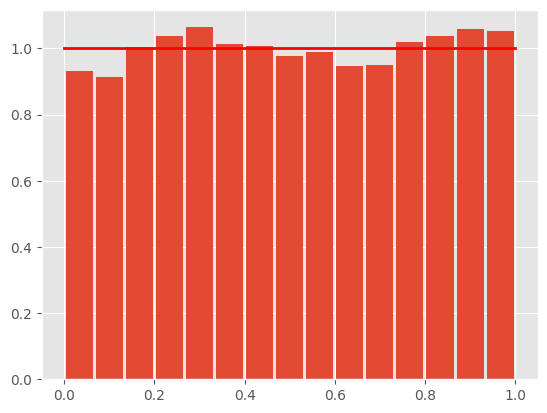

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
s = np.random.uniform(0,1,10000)
count, bins, _ = plt.hist(s, 15, density=True,rwidth=0.9)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')


The vertical axis in this chart is not probability. Since the uniform distribution is a distribution of continuous quantities, the probability can be found in the range (integral). The vertical axis represents the probability density.

Since it is a random number simulation, the red bar is a little bumpy, but ultimately the ceiling of the bar will match the horizontal line drawn in red. This means, for example, the probability of choosing a number between 0 and 0.1 (the integrated value of the range) and the probability of choosing a number between 0.4 and 0.5 (the integrated value of the range, the number between 0.8 and 0.9 is chosen (if the interval on the horizontal axis is the same, such as the value obtained by integrating the range, the probability of choosing a certain number from those ranges is exactly the same)


It can be said that the uniform distribution expresses the assumption that any value can have the same probability (within a certain range) as a probability distribution. This is close to the fact that there is no information in advance as to what kind of value will be produced (although it is verbose, but strictly speaking, there is information that it is within a certain range). Therefore, it is called non-informative prior distribution.




## Inference from Priors

What does it mean to consider prior distributions? For example, let's say you toss a coin five times and get tails all five times. Then, I feel that the probability of heads appearing is not actually 0.5 (by the way, can we find the probability of tails appearing 5 times in a row?). The odds of getting heads don't seem to be 0.5, but it's hard to tell by looking at the coin. However, it is clear from the result of tossing a coin that the probability of heads is not 1.0. So, what to do is to consider a distribution in which the probability of heads with this coin spreads to the left and right of a value smaller than 0.5, but at least it is not 1.0. For example, the following would be considered candidates.

![](https://infoart.ait231.tokushima-u.ac.jp/DS/_images/8afea3685319443ea6c8a11490f467464eb1462bb394bda94cffd7392f732547.png)


The peak of this curve is around 0.2 on the X axis (by the way, the Y axis is the probability density). The probability distribution expresses the assumption that the probability of heads (to be precise) is very small and unlikely to exceed at least 0.5. This distribution is called the beta distribution. The shape of the beta distribution has two parameters　determined by  $\alpha, \beta$ 
In this graph　 $\alpha = 2, \beta = 4$ is set. By the way, when the beta distribution changes the parameters, the curve of the graph also changes considerably.

External Site: Wikipedia: Beta Distribution https://en.wikipedia.org/wiki/Beta_distribution

 
$$
f(x|\alpha, \beta) = \frac{x^{\alpha-1} \, (1-x)^{\beta-1} }{\beta(\alpha, \beta)}
$$


is the probability of success (eg, the probability of getting heads). 
the denominator represents the beta function.

External Site: Wikipedia: Beta Function https://en.wikipedia.org/wiki/Beta_function

On the other hand, the coin landed tails five times. Repeated outcomes, such as flipping a coin, which yield heads or tails, are represented by the binomial distribution. 
given certain probability, throw the coin five times, and we got $x$ heads. we can write: 
  
$$
p(x | \mu) = \binom{N}{x} \, \mu^x \, (1 -\mu)^{N - x}
$$


Now, the probability of getting heads with a coin $p(\mu)$  given the result of 0 heads in a coin toss is $p(x|\mu)$ $p(\mu)$ 

To estimate $p(\mu|x)$ , we apply Bayes' theorem.


$$
p(\mu | x) = \frac{p(\mu)\, p(x|\mu)} { \int p(\mu) \, p(x|\mu) \, d \mu} 
$$

 
The value of represents the probability density obtained from the assumed distribution. Unlike discrete distributions such as the Poisson distribution, in the case of continuous distributions, the value of the probability function is not the probability itself, but the density (which is close to representing the percentage of the whole). value. $p(x|\mu)$  is the probability. The distribution of the data obtained by is called the likelihood.

The meaning of considering the likelihood is that, for example, height can be fitted with a normal distribution, but when actually collecting height samples (data), the parameters of the normal distribution behind this data (mean and standard deviation) to estimate the most probable value.

External site: Wikipedia: Likelihood function https://en.wikipedia.org/wiki/Likelihood_function

This denominator is the integral of the numerator formula. The probability that the coin comes up heads $\mu$ 
) is unknown, but given the result of 0 tails, any probability of heads
(May be 0.2, maybe 0.33, etc.) are being considered.

Intuitively (simply put), the above formula can be thought of as calculating the ratio of the numerator to the whole.

The math sounds daunting, but in this case there is a shortcut. parameters of prior and assumed beta distribution the number of times heads appeared in the parameter
If we add the number of tails to , we get another beta distribution, which is the posterior distribution. in short  Beta distribution of $\alpha=2 +0,\beta=4+5$.  




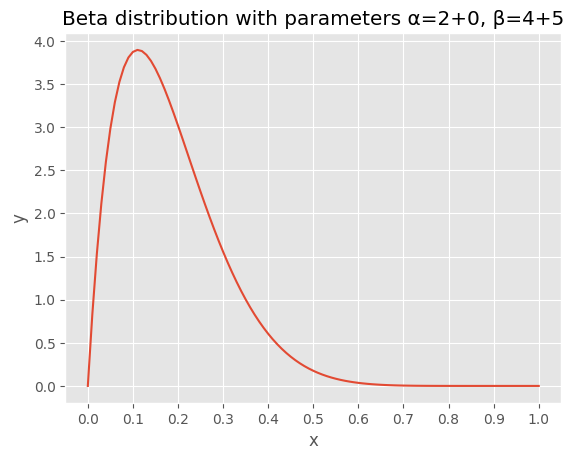

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
x = np.linspace(0, 1, 101)
y = beta.pdf(x, 2 + 0, 4 + 5)
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
ax.plot(df['x'], df['y'])
ax.set_title("Beta distribution with parameters α=2+0, β=4+5")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()


You can see that the probability of heads has moved further to the left and is closer to 0.1 than his initial 0.5 and the peak value of the prior and assumed beta distribution curves. Huh?

The beta distribution has a formula for finding the mean.

$\frac{\alpha + x}{\alpha + \beta+ N}$ 
 
  So, substituting the parameters of the posterior distribution,
 
  becomes $\frac{2 + 0}{4 + 5} = 0.222$ .
  
 By getting tails five times in a row, the probability of getting heads was reduced to 0.222. Note that it is not 0, such as 5=0.

This calculation method is also used to estimate the mortality rate for each municipality introduced at the beginning. In a small village, there may be zero dead villagers for the year. However, from this we cannot assume that the mortality rate in the village is zero. Therefore, the mortality rate of the village is calculated using the national average as the prior distribution.

External site: Ministry of Health, Labor and Welfare of Japan: What is Bayesian estimation? https://www.mhlw.go.jp/toukei/saikin/hw/life/ckts05/sanko02.html in Japanese  

Applications of the beta distribution Let's think about the application for a moment.

```
In one black company, 40% of new hires quit every year. However, none of the five people hired this year have retired yet. In other words, since the turnover rate is 0.0, can we assume that this company has become a white company?
```

A 0.0 turnover rate doesn't necessarily mean a company is white, but let's consider it as a simple example of testing Bayesian methods.

First of all, even if the employee turnover rate for this fiscal year is 0.0, it is not possible to judge this company's employee turnover rate to be 0.0, in other words, a white company. Prior information is that the turnover rate in the past is 0.4. However, we cannot be sure that it was 0.4 every year, so let's assume a beta distribution where the curve peaks at 0.4 or less.


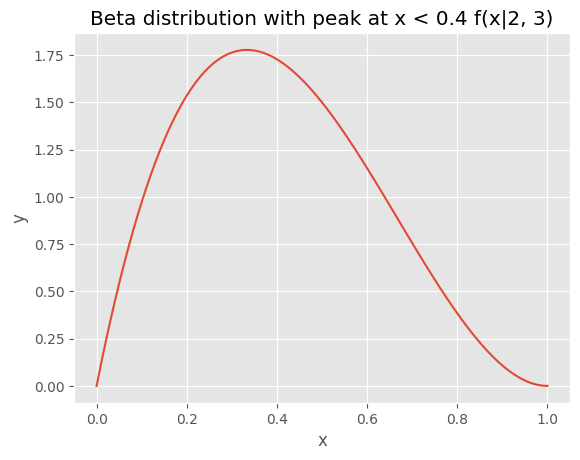

In [5]:
x = np.linspace(0, 1, 101)
y = beta.pdf(x, 2, 3)
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
ax.plot(df['x'], df['y'])
ax.set_title("Beta distribution with peak at x < 0.4 f(x|2, 3)")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()



Let's think of this as prior information (prior distribution) representing the past turnover rate of this black company. The parameters of this beta distribution are  $\alpha =2, \beta=3$

Second, new data show that 0 of his 5 quit. The fact that 0 out of 5 are positive (in this case, the case of quitting) can be represented by the binomial distribution that we have been dealing with in this class so far. It is known that when the prior distribution is a beta distribution and the data follows the binomial distribution, the posterior distribution obtained by the Bayesian method becomes a beta distribution. The prior beta is said to be the conjugate prior of the binomial distribution.

When inferring with the Bayesian method, assuming a conjugate prior distribution, there is a shortcut to easily obtain the posterior distribution without calculating the integral. The parameters of the beta distribution, which is the prior distribution, are  $\alpha = 2, \beta = 3$   and the data is $y = 0, n - y  = 5$  so the parameters of the beta distribution, which is the posterior distribution, are $\alpha = 2, \beta = 8$ 


Text(0.5, 1.0, 'Turnover Rate around 0.25')

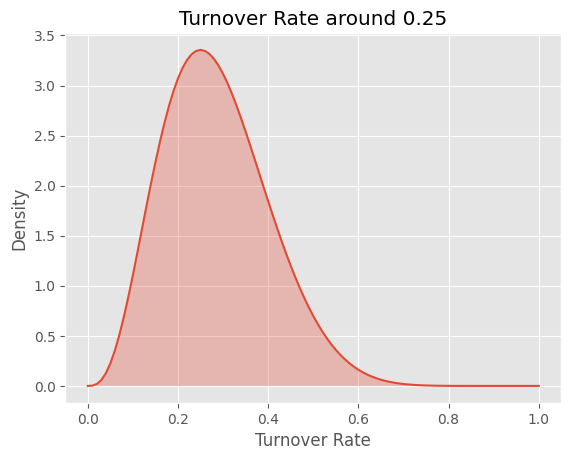

In [6]:

x = np.linspace(0, 1, 101)
y = beta.pdf(x, 4, 10)
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
ax.plot(df['x'], df['y'])
ax.fill_between(df['x'], 0, df['y'], alpha=0.3)
ax.set_xlabel("Turnover Rate")
ax.set_ylabel("Density")
ax.set_title("Turnover Rate around 0.25")


The peak of the mountain is around 0.25. In other words, even if no one quits this year, 40% of the employees quit from the beginning. Even if it improves, the turnover rate of this company can still be estimated to be around 0.25 (although there is too little data).

## Traditional Statistics and Bayesian Inference

Recently, in fields such as medicine and psychology, warnings have been issued against the traditional statistical method of testing. For example, in traditional statistical analysis, when testing for differences in means, "the population mean is $z$ 
is the null hypothesis, and the mean value of the population is
not $z$ " is the alternative hypothesis.
  
Then, find the p-value from the distribution of the data, and if it is less than 0.05 (or 0.01), reject the null hypothesis and accept the alternative hypothesis.

However, a common misconception is that the p-value does not represent the probability that the null hypothesis is correct. Traditional hypothesis testing assumes that the null hypothesis is true. Furthermore, the sample mean of the data and the population mean will generally not match. The p-value represents the probability of getting the data in front of you (the sample mean calculated from it) and more extreme data if the null hypothesis is true. Research papers misunderstanding this are actually abundant all over the world.

However, it is also true that the logic of statistical hypothesis testing is too roundabout and difficult to understand. And if the p-value is less than 0.05, it is "significant", but if it is exactly 0.05, it is judged to be "not significant", so a small difference in p-value makes a conclusion (there is a difference, there is no difference) It would be hard to convince that it would change completely.

On the other hand, Bayesian estimation can find the probability that the null hypothesis is correct. We use Bayes' theorem as follows.


$$
p(H_0|D) = \frac{p(D|H_0) \, p(H_0)} { p(D) }
$$

 
In words, the null hypothesis  $H_0$   sets the probability of being correct (in a traditional hypothesis test, this is 1), and under this assumption the data   is obtained (conditional probability), the posterior probability of the data ( $D$ ), the null hypothesis  $H_0$  is the correct probability. If you want to formulate an alternative hypothesis, you can similarly find the probability that the alternative hypothesis is correct.

Again, the problem is how to set the probability that the null hypothesis is correct.

In this regard, Bayesian inference has been criticized by traditional statistics in the past.

As for this, one method is to assume that there is no information about the probability that the null hypothesis is correct (no information prior distribution), and it is currently being actively applied.

## MCMC


If you try to apply Bayes' theorem to a complex probability distribution, the integral of the denominator becomes complicated, and the solution may not be found realistically (or rather, it cannot be found in current data science applications). are mostly).

The posterior distribution cannot be calculated without solving the integral of the denominator. Therefore, in the past, it was often practically impossible to obtain the posterior distribution by Bayesian inference in realistic data analysis.

However, several methods have now been developed to obtain the posterior distribution without solving the integral itself. It is a simulation method. Very simply, it actually generates random numbers from the posterior distribution. A representative method of this is the Monte Carlo method.
<iframe width="560" height="315" src="https://www.youtube.com/embed/ELetCV_wX_c" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>



In the video, you can think of it as dropping sand (dots) evenly (so that the sand doesn't pile up) from directly above the square. Suppose that this square is covered tightly (and without overlapping) with scattered sand. At this time, pi can be estimated based on the numerical value obtained by dividing the number of sands in the circle by the total number of sands dropped.

The same is true for the posterior distribution. Even if the integration of the posterior distribution is difficult, if a value can be randomly extracted from the posterior distribution, for example, it will be repeated a million times. Then you get 1 million values from the posterior distribution, so you can sum them up and divide by 1 million to get the sample mean. This sample mean is used as an estimate of the mean of the posterior distribution.

Of course, such work is performed by a computer, but extracting random values from the posterior distribution one million times is a simple but heavy process for a computer. Also, if you drop sand from above, naturally there will be areas where it overlaps. Increased overlap also affects percentage calculations.

Therefore, a more efficient method of retrieving variables (evenly so that the sand does not overlap) has been developed. One of them is the Markov chain Monte Carlo method.

<iframe width="560" height="315" src="https://www.youtube.com/embed/3mPxMlSiRvk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>




## Applications of Bayes


Although Bayesian inference has become widely used in the past few years, its application has been actively pursued for some time. For example, during World War II, the British government had a successful project to crack the German military code (Enigma). By breaking the code, it was possible to understand the strategy of German submarines and prevent attacks on cargo ships carrying supplies to Britain. However, the British government kept this confidential for a long time. Also, mathematician Alan Turing, who played an important role in breaking the code, was not recognized for this achievement and was not awarded by the government. Therefore, it can be said that the power of Bayesian inference was not known for a long time.


External site: Wikipedia: Alan Turing https://en.wikipedia.org/wiki/Alan_Turing

It is also known to be used to identify the sea area when a submarine sinks. Specifically, a nautical chart (map of the sea) is divided into several grids, and the probability of a submarine sinking is assigned to each grid (this is the prior probability). Then, we search for sea areas with high prior probabilities, and if we cannot find them, we update the prior probabilities, find the posterior probabilities, and further narrow down the sea areas.


<iframe width="560" height="315" src="https://www.youtube.com/embed/QIrC-8T_hqk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>




# Kaggle


From June 30th to July 28th, students who are staying in Tokushima will be participating in a data science competition called Kaggle as a group project. An explanation of Kaggle is provided below.
However, for students who are not staying in Tokushima, or international students who prefer not to work in Japanese, they will be individually participating in the Kaggle competition. During these five sessions, we will specify which competition you should participate in. The task involves participating in the competition and submitting the work you have done on Kaggle upon achieving results. (In reality, you will provide the URL of the notebook you created on Kaggle.)


Kaggle is the world's largest platform that connects data scientists and engineers with companies and local governments in the field of data science. The main feature of Kaggle is the Competition, in which companies and local governments submit data analysis challenges, and prizes are awarded for the most accurate analysis results. We also offer hiring for talented data scientists.


## Registration on Kaggle


First, students must register with Kaggle, i.e. create an account on Kaggle.

https://www.kaggle.com/

An email address (and maybe mobile phone number) is required for registration. It doesn't matter if it's a university address or a Google account, but when you register, you'll be asked to declare the Username you set later. Please avoid specifying your student number or C account as your Username. Your Username will be public to the world, so you should not use information that leads to personal information.

After creating an account, it may be good to know about Kaggle on the following external sites.

<iframe width="560" height="315" src="https://www.youtube.com/embed/8yZMXCaFshs" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>





<iframe width="560" height="315" src="https://www.youtube.com/embed/4BOtr1PZ2D8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

https://www.kaggle.com/competitions/ubiquant-market-prediction





<iframe width="560" height="315" src="https://www.youtube.com/embed/I3FBJdiExcg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>